# Assignment 3: Hello Vectors

In this assignment we will explore word vectors.
In natural language processing, we represent each word as a vector consisting of numbers. The vector encodes the meaning of the word. These numbers (or weights) for each word are learned using various machine learning models. In this assignment we will:

- Predict analogies between words.
- Use PCA to reduce the dimensionality of the word embeddings and plot them in two dimensions.
- Compare word embeddings by using a similarity measure (the cosine similarity).
- Understand how these vector space models work.

## Table of Contents

- [1 - Predict the Countries from Capitals](#1)
    - [1.1 Importing the Data](#1-1)
    - [1.2 Cosine Similarity](#1-2)
        - [Exercise 1 - cosine_similarity (UNQ_C1)](#ex-1)
    - [1.3 Euclidean Distance](#1-3)
        - [Exercise 2 - euclidean (UNQ_C2)](#ex-2)
    - [1.4 Finding the Country of each Capital](#1-4)
        - [Exercise 3 - get_country (UNQ_C3)](#ex-3)
    - [1.5 Model Accuracy](#1-5)
        - [Exercise 4 - get_accuracy (UNQ_C4)](#ex-4)
- [2 - Plotting the vectors using PCA](#2)
    - [Exercise 5 - compute_pca (UNQ_C5)](#ex-5)

<a name='1'></a>
## 1 - Predict the Countries from Capitals

In this assignment we are going to predict the **countries**  that correspond to some **capitals**.
We are playing trivia against some second grader who just took their geography test and knows all the capitals by heart.
Thanks to NLP, we will be able to answer the questions properly. In other words, we will write a program that can give
us the country by its capital. That way we are pretty sure we will win the trivia game. We will start by exploring the data set.

###  1.1 Importing the Data

Let's start by importing some essential Python libraries and the load dataset.
The dataset will be loaded as a [Pandas DataFrame]

In [4]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import w3_unittest

from utils import get_vectors

In [5]:
data = pd.read_csv('./data/capitals.txt', delimiter=' ')
data.columns = ['city1', 'country1', 'city2', 'country2']

# print first five elements in the DataFrame
data.head(5)

city1 country1    city2     country2
0  Athens   Greece  Bangkok     Thailand
1  Athens   Greece  Beijing        China
2  Athens   Greece   Berlin      Germany
3  Athens   Greece     Bern  Switzerland
4  Athens   Greece    Cairo        Egypt

Now we will load the word embeddings as a [Python dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries).

In [6]:
word_embeddings = pickle.load(open("./data/word_embeddings_subset.p", "rb"))
len(word_embeddings)  # there should be 243 words that will be used in this assignment

243

Each of the word embedding is a 300-dimensional vector.

In [7]:
print("dimension: {}".format(word_embeddings['Spain'].shape[0]))

dimension: 300


#### Predict relationships among words

Now we will write a function that will use the word embeddings to predict relationships among words.
* The function will take as input three words.
* The first two are related to each other.
* It will predict a 4th word which is related to the third word in a similar manner as the two first words are related to each other.
* As an example, "Athens is to Greece as Bangkok is to ______"?
* We will write a program that is capable of finding the fourth word.

A similar analogy would be the following:

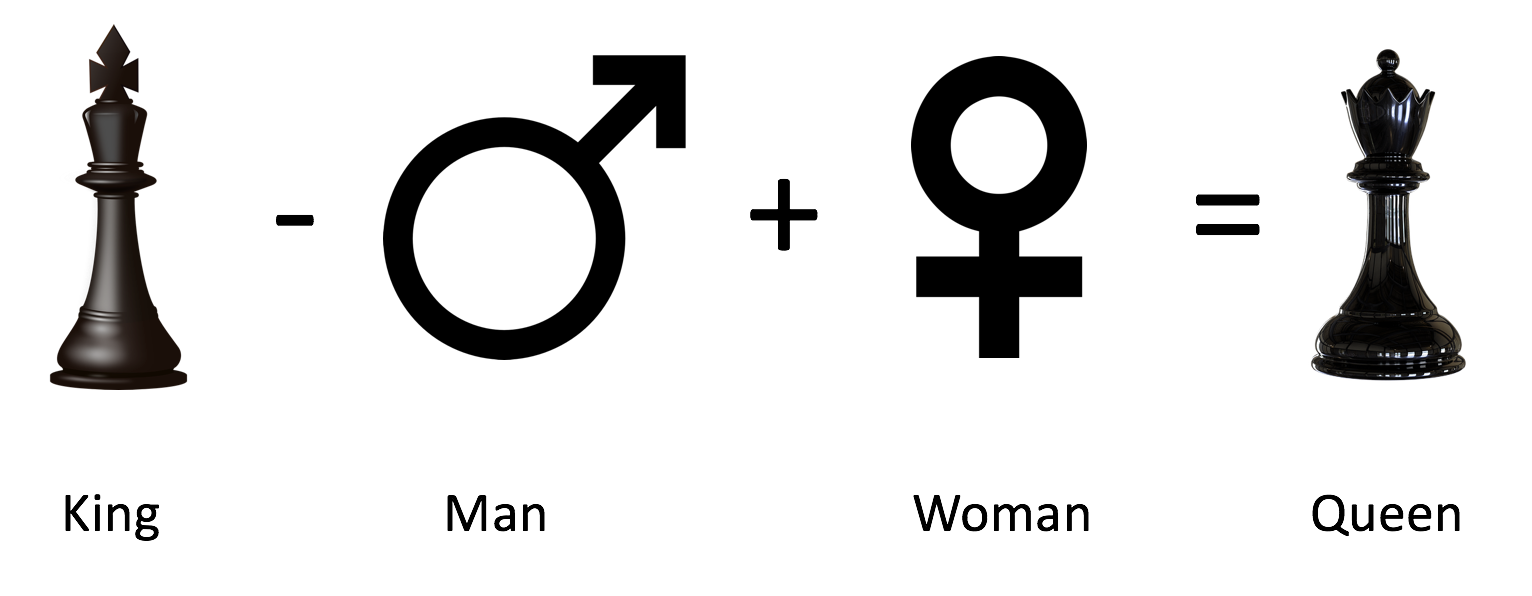

<a name='1-2'></a>
### 1.2 Cosine Similarity

The cosine similarity function is:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

$A$ and $B$ represent the word vectors and $A_i$ or $B_i$ represent index i of that vector. If A and B are identical, we get $cos(\theta) = 1$.
* Otherwise, if they are the total opposite, meaning, $A= -B$, then $cos(\theta) = -1$.
* If  $cos(\theta) =0$, that means that they are orthogonal (or perpendicular).
* Numbers between 0 and 1 indicate a similarity score.
* Numbers between -1 and 0 indicate a dissimilarity score.

In [8]:
# Cosine_similarity

def cosine_similarity(A, B):
    '''
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        cos: numerical number representing the cosine similarity between A and B.
    '''
    dot = np.dot(A, B)
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)
    cos = dot / (norma * normb)

    return cos

In [9]:
king = word_embeddings['king']
queen = word_embeddings['queen']

cosine_similarity(king, queen)

0.6510956

<a name='1-3'></a>
### 1.3 Euclidean Distance

We will now implement a function that computes the similarity between two vectors using the Euclidean distance.
Euclidean distance is defined as:

$$ \begin{aligned} d(\mathbf{A}, \mathbf{B})=d(\mathbf{B}, \mathbf{A}) &=\sqrt{\left(A_{1}-B_{1}\right)^{2}+\left(A_{2}-B_{2}\right)^{2}+\cdots+\left(A_{n}-B_{n}\right)^{2}} \\ &=\sqrt{\sum_{i=1}^{n}\left(A_{i}-B_{i}\right)^{2}} \end{aligned}$$

* $n$ is the number of elements in the vector
* $A$ and $B$ are the corresponding word vectors. 
* The more similar the words, the more likely the Euclidean distance will be close to 0. 

In [11]:
# Euclidean

def euclidean(A, B):
    """
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        d: numerical number representing the Euclidean distance between A and B.
    """

    # euclidean distance    
    d = np.linalg.norm(A - B)

    return d

In [12]:
# Test our function
euclidean(king, queen)

2.4796925

<a name='1-4'></a>
### 1.4 Finding the Country of each Capital

Now, we will use the previous functions to compute similarities between vectors,
and use these to find the capital cities of countries. We will write a function that
takes in three words, and the embeddings dictionary. We need to find the
capital cities. For example, given the following words: 

- 1: Athens 2: Greece 3: Baghdad,

task is to predict the country 4: Iraq.

In [14]:
# Get_country

def get_country(city1, country1, city2, embeddings, cosine_similarity=cosine_similarity):
    """
    Input:
        city1: a string (the capital city of country1)
        country1: a string (the country of capital1)
        city2: a string (the capital city of country2)
        embeddings: a dictionary where the keys are words and values are their emmbeddings
    Output:
        countries: a dictionary with the most likely country and its similarity score
    """

    # store the city1, country 1, and city 2 in a set called group
    group = set([city1, country1, city2])

    # get embeddings of city 1
    city1_emb = embeddings[city1]

    # get embedding of country 1
    country1_emb = embeddings[country1]

    # get embedding of city 2
    city2_emb = embeddings[city2]

    # get embedding of country 2 (it's a combination of the embeddings of country 1, city 1 and city 2)
    vec = country1_emb - city1_emb + city2_emb

    # Initialize the similarity to -1 (it will be replaced by a similarities that are closer to +1)
    similarity = -1

    # initialize country to an empty string
    country = ''

    # loop through all words in the embeddings dictionary
    for word in embeddings.keys():

        # first check that the word is not already in the 'group'
        if word not in group:

            # get the word embedding
            word_emb = embeddings[word]

            # calculate cosine similarity between embedding of country 2 and the word in the embeddings dictionary
            cur_similarity = cosine_similarity(vec, word_emb)

            # if the cosine similarity is more similar than the previously best similarity...
            if cur_similarity > similarity:

                # update the similarity to the new, better similarity
                similarity = cur_similarity

                # store the country as a tuple, which contains the word and the similarity
                country = (word, similarity)
                
    return country

In [15]:
# Testing the function
get_country('Athens', 'Greece', 'Cairo', word_embeddings)

('Egypt', 0.7626822)

<a name='1-5'></a>
### 1.5 Model Accuracy

Now we will test our new function on the dataset and check the accuracy of the model:

$$\text{Accuracy}=\frac{\text{Correct # of predictions}}{\text{Total # of predictions}}$$

In [17]:
# Get_accuracy

def get_accuracy(word_embeddings, data, get_country=get_country):
    '''
    Input:
        word_embeddings: a dictionary where the key is a word and the value is its embedding
        data: a pandas DataFrame containing all the country and capital city pairs

    '''
    # initialize num correct to zero
    num_correct = 0

    # loop through the rows of the dataframe
    for i, row in data.iterrows():

        # get city1
        city1 = row[0]

        # get country1
        country1 = row[1]

        # get city2
        city2 = row[2]

        # get country2
        country2 = row[3]

        # use get_country to find the predicted country2
        predicted_country2, _ = get_country(city1, country1, city2, word_embeddings)

        # if the predicted country2 is the same as the actual country2...
        if predicted_country2 == country2:
            # increment the number of correct by 1
            num_correct += 1

    # get the number of rows in the data dataframe (length of dataframe)
    m = len(data)

    # calculate the accuracy by dividing the number correct by m
    accuracy = num_correct / m

    return accuracy

In [18]:
accuracy = get_accuracy(word_embeddings, data)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.92


<a name='2'></a>
## 2 - Plotting the vectors using PCA

Now we will explore the distance between word vectors after reducing their dimension.
The technique we will employ is known as
[*principal component analysis* (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis).
As we saw, we are working in a 300-dimensional space in this case.
Although from a computational perspective we were able to perform a good job,
it is impossible to visualize results in such high dimensional spaces.

We can think of PCA as a method that projects our vectors in a space of reduced
dimension, while keeping the maximum information about the original vectors in
their reduced counterparts. In this case, by *maximum infomation* we mean that the
Euclidean distance between the original vectors and their projected siblings is
minimal. Hence vectors that were originally close in the embeddings dictionary,
will produce lower dimensional vectors that are still close to each other.

We will see that when you map out the words, similar words will be clustered
next to each other. For example, the words 'sad', 'happy', 'joyful' all describe
emotion and are supposed to be near each other when plotted.
The words: 'oil', 'gas', and 'petroleum' all describe natural resources.
Words like 'city', 'village', 'town' could be seen as synonyms and describe a
similar thing.

Before plotting the words, we need to first be able to reduce each word vector
with PCA into 2 dimensions and then plot it. The steps to compute PCA are as follows:

1. Mean normalize the data
2. Compute the covariance matrix of your data ($\Sigma$). 
3. Compute the eigenvectors and the eigenvalues of your covariance matrix
4. Multiply the first K eigenvectors by your normalized data. The transformation should look something as follows:

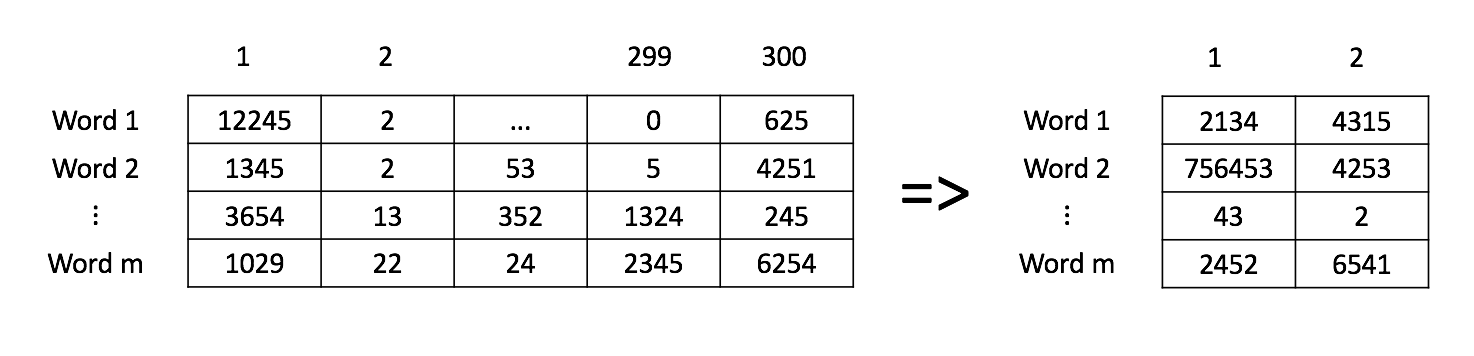

In [20]:
# Compute_PCA


def compute_pca(X, n_components=2):
    """
    Input:
        X: of dimension (m,n) where each row corresponds to a word vector
        n_components: Number of components you want to keep.
    Output:
        X_reduced: data transformed in 2 dims/columns + regenerated original data
    pass in: data as 2D NumPy array
    """
    # mean center the data
    X_demeaned = X - np.mean(X, axis=0)

    # calculate the covariance matrix
    covariance_matrix = np.cov(X_demeaned, rowvar=False)

    # calculate eigenvectors & eigenvalues of the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix)

    # sort eigenvalue in increasing order (get the indices from the sort)
    idx_sorted = np.argsort(eigen_vals)
    
    # reverse the order so that it's from highest to lowest.
    idx_sorted_decreasing = idx_sorted[::-1]

    # sort the eigen values by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

    # sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:, idx_sorted_decreasing]

    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or n_components)
    eigen_vecs_subset = eigen_vecs_sorted[:, :n_components]

    # transform the data by multiplying the transpose of the eigenvectors with the transpose of the de-meaned data
    # Then take the transpose of that product.
    X_reduced = np.dot(eigen_vecs_subset.T, X_demeaned.T).T

    return X_reduced

In [21]:
# Testing the function
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print("Original matrix was " + str(X.shape) + " and it became:")
print(X_reduced)

Your original matrix was (3, 10) and it became:
[[ 0.43437323  0.49820384]
 [ 0.42077249 -0.50351448]
 [-0.85514571  0.00531064]]


In [23]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
X = get_vectors(word_embeddings, words)

print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

You have 11 words each of 300 dimensions thus X.shape is: (11, 300)


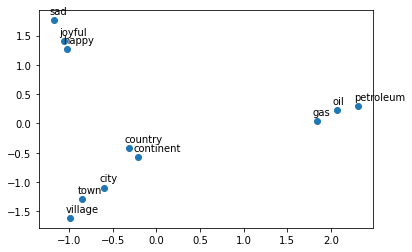

In [24]:
# Plot
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()

**What do we notice?**

The word vectors for gas, oil and petroleum appear related to each other,
because their vectors are close to each other.  Similarly, sad, joyful
and happy all express emotions, and are also near each other.